In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import os 
os.listdir('./')

['.config', 'AB_NYC_2019.csv', 'sample_data']

In [ ]:
data = pd.read_csv('AB_NYC_2019.csv')

In [ ]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

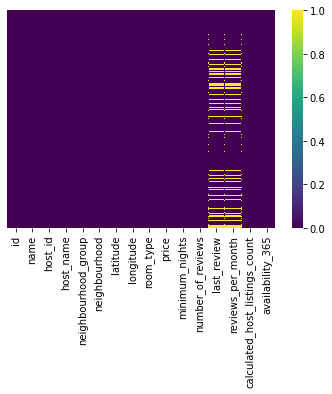

In [ ]:
sns.heatmap(data.isnull(),cmap='viridis',yticklabels=False)

In [ ]:
data_cp = data.copy()

In [ ]:
def review(cols):
  if pd.isnull(cols):
    return 0
  else:
    return cols

In [ ]:
data_cp['reviews_per_month'] = data['reviews_per_month'].apply(review)

In [ ]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
data.shape

(48895, 16)

In [ ]:
pd.isnull(data['last_review'][2])

True

In [ ]:
data_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

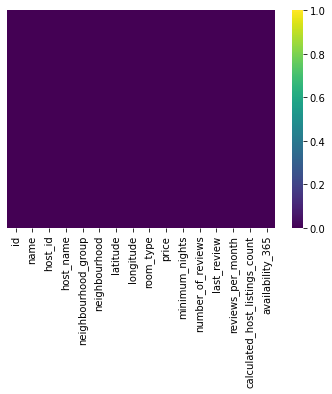

In [ ]:
sns.heatmap(data_cp.isnull(),cmap='viridis',yticklabels=False)

In [ ]:
data_cp['number_of_reviews'].value_counts()

0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
404        1
436        1
388        1
341        1
607        1
Name: number_of_reviews, Length: 394, dtype: int64

In [ ]:
def year(col):
  if col!=0:
    a = col.split('-')[0]
    return int(a)
  else:
    return 0

In [ ]:
data_cp['year'] = data_cp['last_review'].apply(year)

In [ ]:
data['last_review'].isnull().sum()

10052

In [ ]:
data_cp['year'].value_counts()

2019    25209
0       10052
2018     6050
2017     3205
2016     2707
2015     1393
2014      199
2013       48
2012       25
2011        7
Name: year, dtype: int64

In [ ]:
data_cp.drop(['id', 'name', 'host_id', 'host_name'],axis=1,inplace=True)

In [ ]:
data_cp.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018


In [ ]:
data_cp['reviews_per_month'] = data['reviews_per_month']

In [ ]:
data_cp['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [ ]:
df = pd.get_dummies(data_cp[['room_type']],drop_first=False)

In [ ]:
data_cp.drop('room_type',inplace=True,axis=1)

In [ ]:
data_cp2 = pd.concat([data_cp,df],axis=1)

In [ ]:
data_cp2.head()

,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,Brooklyn,Kensington,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,2018,0,1,0
1,Manhattan,Midtown,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,2019,1,0,0
2,Manhattan,Harlem,40.80902,-73.94190,150,3,0,0,0.00,1,365,0,0,1,0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,2019,1,0,0
4,Manhattan,East Harlem,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,2018,1,0,0


In [ ]:
data_cp2['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
df2 = pd.get_dummies(data_cp2['neighbourhood_group'],drop_first=False)

In [ ]:
df2.drop(['Queens','Bronx','Staten Island'],inplace = True,axis=1)

In [ ]:
data_cp2 = pd.concat([data_cp2,df2],axis=1)

In [ ]:
data_cp2.drop('room_type_Entire home/apt',axis = 1,inplace=True)

In [ ]:
data_cp2.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,room_type_Private room,room_type_Shared room,Brooklyn,Manhattan
0,40.64749,-73.97237,149,1,9,0.21,6,365,2018,1,0,1,0
1,40.75362,-73.98377,225,1,45,0.38,2,355,2019,0,0,0,1
2,40.80902,-73.94190,150,3,0,0.00,1,365,0,1,0,0,1
3,40.68514,-73.95976,89,1,270,4.64,1,194,2019,0,0,1,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,2018,0,0,0,1


In [ ]:
data_cp2.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'price', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'year', 'room_type_Private room',
       'room_type_Shared room', 'Brooklyn', 'Manhattan'],
      dtype='object')

In [ ]:
data_cp2.drop(['neighbourhood_group', 'neighbourhood','last_review'],inplace=True,axis=1)

In [ ]:
data_cp2.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,room_type_Private room,room_type_Shared room,Brooklyn,Manhattan
0,40.64749,-73.97237,149,1,9,0.21,6,365,2018,1,0,1,0
1,40.75362,-73.98377,225,1,45,0.38,2,355,2019,0,0,0,1
2,40.80902,-73.94190,150,3,0,0.00,1,365,0,1,0,0,1
3,40.68514,-73.95976,89,1,270,4.64,1,194,2019,0,0,1,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,2018,0,0,0,1


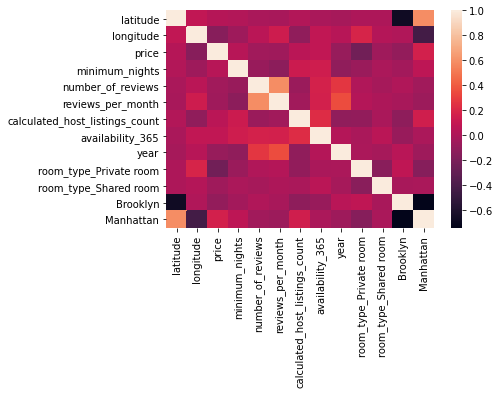

In [ ]:
sns.heatmap(data_cp2.corr())

In [ ]:
data_cp2.corr()['price']

latitude                          0.033939
longitude                        -0.150019
price                             1.000000
minimum_nights                    0.042799
number_of_reviews                -0.047954
reviews_per_month                -0.050564
calculated_host_listings_count    0.057472
availability_365                  0.081829
year                             -0.085167
room_type_Private room           -0.240246
room_type_Shared room            -0.053613
Brooklyn                         -0.098603
Manhattan                         0.163976
Name: price, dtype: float64

In [ ]:
data_cp2[data_cp2['year']==0]

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,room_type_Private room,room_type_Shared room,Brooklyn,Manhattan
2,40.80902,-73.94190,150,3,0,0.0,1,365,0,1,0,0,1
19,40.79685,-73.94872,190,7,0,0.0,2,249,0,0,0,0,1
26,40.86754,-73.92639,80,4,0,0.0,1,0,0,1,0,0,1
36,40.68876,-73.94312,35,60,0,0.0,1,365,0,1,0,1,0
38,40.63702,-73.96327,150,1,0,0.0,1,365,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,0.0,2,9,0,1,0,1,0
48891,40.70184,-73.93317,40,4,0,0.0,2,36,0,1,0,1,0
48892,40.81475,-73.94867,115,10,0,0.0,1,27,0,0,0,0,1
48893,40.75751,-73.99112,55,1,0,0.0,6,2,0,0,1,0,1


In [132]:
data_cp2.drop('year',axis = 1, inplace = True)

In [133]:
data_cp2['host_id'] = data['host_id']

In [134]:
data_cp2.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Private room,room_type_Shared room,Brooklyn,Manhattan,host_id
0,40.64749,-73.97237,149,1,9,0.21,6,365,1,0,1,0,2787
1,40.75362,-73.98377,225,1,45,0.38,2,355,0,0,0,1,2845
2,40.80902,-73.94190,150,3,0,0.00,1,365,1,0,0,1,4632
3,40.68514,-73.95976,89,1,270,4.64,1,194,0,0,1,0,4869
4,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,0,1,7192


In [136]:
data_cp2['host_id'].value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
            ... 
1641589        1
4070519        1
208106618      1
235939247      1
1288080        1
Name: host_id, Length: 37457, dtype: int64

In [138]:
data_cp2['host_id'].nunique()

37457

In [139]:
data_cp2['room_type_Private room'].sum()

22326

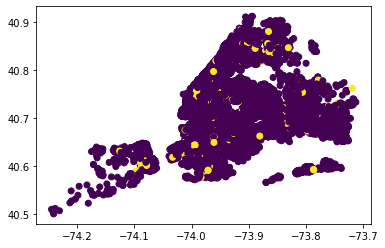

In [144]:
plt.scatter(data_cp2['longitude'],data_cp2['latitude'],c = data_cp2['room_type_Shared room'])

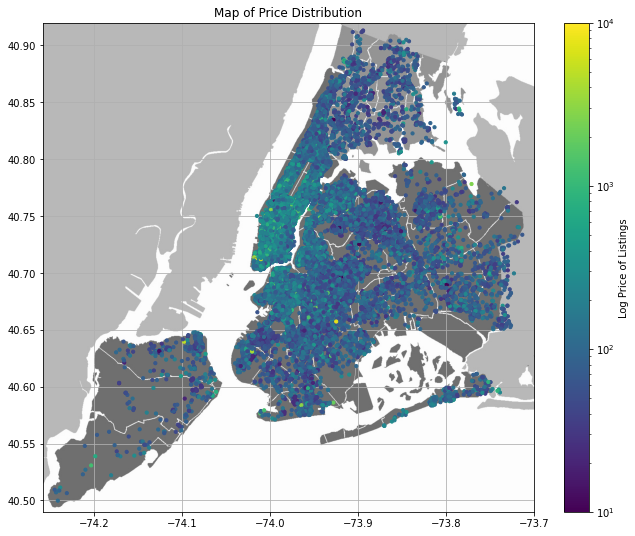

In [150]:
import matplotlib
plt.figure(figsize=(11,9))
map_img = plt.imread('New_York_City_.png',0)
plt.imshow(map_img,zorder=1,aspect='auto',extent=[-74.258, -73.7, 40.49, 40.92])
g = plt.scatter(x=data_cp2['longitude'],y=data_cp2['latitude'],c=data_cp2['price'],cmap=plt.get_cmap('viridis'),s=10,zorder=2,norm=matplotlib.colors.LogNorm())
plt.title('Map of Price Distribution')
plt.colorbar(g).set_label('Log Price of Listings')
plt.grid(True)

In [151]:
data_cp2.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'room_type_Private room', 'room_type_Shared room',
       'Brooklyn', 'Manhattan', 'host_id'],
      dtype='object')

In [152]:
from sklearn.model_selection import train_test_split
x = data_cp2[['latitude', 'longitude','minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'room_type_Private room', 'room_type_Shared room',
       'Brooklyn', 'Manhattan', 'host_id']]
y = data_cp2['price']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3)

In [153]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [154]:
pred1 = lr.predict(xtest)

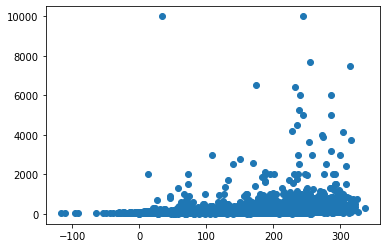

In [155]:
plt.scatter(pred1,ytest)

In [161]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("------------------------------------")
print('Using Linear Regression Model ')
print('Mean Absolute Error : ',mean_absolute_error(ytest,pred1))
print('Mean Squared Error : ',mean_squared_error(ytest,pred1))
print('Root mean square Error : ',np.sqrt(mean_squared_error(ytest,pred1)))

------------------------------------
Using Linear Regression Model 
Mean Absolute Error :  74.68438042725325
Mean Squared Error :  61856.93878710787
Root mean square Error :  248.71055222307692


In [159]:
from sklearn.svm import LinearSVR
svr = LinearSVR()
svr.fit(xtrain,ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [160]:
pred2 = svr.predict(xtest)

In [162]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("-----------------------------------")
print("Using SVM linear Regression")
print('Mean Absolute Error : ',mean_absolute_error(ytest,pred1))
print('Mean Squared Error : ',mean_squared_error(ytest,pred1))
print('Root mean square Error : ',np.sqrt(mean_squared_error(ytest,pred1)))

-----------------------------------
Using SVM linear Regression
Mean Absolute Error :  74.68438042725325
Mean Squared Error :  61856.93878710787
Root mean square Error :  248.71055222307692
